In [1]:
import pandas as pd
import json
import __CDS__

data_fldr = "/l/mesur/aedinge/distortion_polarization/"

with open(data_fldr + "users_2016_activity.txt") as f:
    users_2016 = json.load(f)
    
with open(data_fldr + "users_2020_activity.txt") as f:
    users_2020 = json.load(f)
    
users_2016 = {int(key):val for key,val in users_2016.items()}
users_2020 = {int(key):val for key,val in users_2020.items()}

long_users = [user for user in set(users_2016.keys()).intersection(set(users_2020.keys())) if users_2016[user]>10 and users_2020[user]>10]

tweets_2020 = pd.read_csv(data_fldr + "231109_all_variants_2020.csv", index_col = "Unnamed: 0", lineterminator='\n')
tweets_2016 = pd.read_csv(data_fldr + "231109_all_variants_2016.csv", index_col = "Unnamed: 0", lineterminator='\n')

In [2]:
sum([users_2020[key] for key in long_users])

11852917

In [3]:
sum([users_2016[key] for key in long_users])

13376733

In [4]:
user_ct_2020 = tweets_2020.groupby('user_id').sum()
user_ct_2016 = tweets_2016.groupby('user_id').sum()


In [5]:
user_ct_2020['total_tweets'] = pd.Series(users_2020)
user_ct_2016['total_tweets'] = pd.Series(users_2016)

In [6]:
cols = ['CDS', 'Labeling and mislabeling', 'Catastrophizing',
       'Dichotomous Reasoning', 'Emotional Reasoning',
       'Disqualifying the Positive', 'Magnification and Minimization',
       'Mental Filtering', 'Mindreading', 'Fortune-telling',
       'Overgeneralizing', 'Personalizing', 'Should statements', 'total_tweets']

In [20]:

for col in cols:
    n16 = user_ct_2016[col].sum()
    p16 = user_ct_2016[col].sum()/user_ct_2016['total_tweets'].sum()*100
    n20 = user_ct_2020[col].sum()
    p20 = user_ct_2020[col].sum()/user_ct_2020['total_tweets'].sum()*100
    print(col, f"{n16} ({round(p16, 3)}) & {n20} ({round(p20, 2)}) & ")


CDS 2311825 (17.282) & 2973513 (25.09) & 
Labeling and mislabeling 210160 (1.571) & 246603 (2.08) & 
Catastrophizing 7954 (0.059) & 12443 (0.1) & 
Dichotomous Reasoning 1486776 (11.115) & 2066595 (17.44) & 
Emotional Reasoning 472 (0.004) & 987 (0.01) & 
Disqualifying the Positive 8136 (0.061) & 10756 (0.09) & 
Magnification and Minimization 146609 (1.096) & 190099 (1.6) & 
Mental Filtering 1639 (0.012) & 2068 (0.02) & 
Mindreading 158970 (1.188) & 240695 (2.03) & 
Fortune-telling 49724 (0.372) & 61884 (0.52) & 
Overgeneralizing 34812 (0.26) & 61132 (0.52) & 
Personalizing 13774 (0.103) & 20297 (0.17) & 
Should statements 498935 (3.73) & 652223 (5.5) & 
total_tweets 13376733 (100.0) & 11852917 (100.0) & 


In [10]:
user_ct_2016[cols].sum()

CDS                                2311825
Labeling and mislabeling            210160
Catastrophizing                       7954
Dichotomous Reasoning              1486776
Emotional Reasoning                    472
Disqualifying the Positive            8136
Magnification and Minimization      146609
Mental Filtering                      1639
Mindreading                         158970
Fortune-telling                      49724
Overgeneralizing                     34812
Personalizing                        13774
Should statements                   498935
total_tweets                      13376733
dtype: int64

In [14]:
import numpy as np

rs = np.random.default_rng(seed=19880205)
num_runs = 1000


def bootstrap_sample(df, rs, num_runs):
    bootstrap = pd.DataFrame(index=pd.Index(np.arange(1, num_runs + 1), name="num_runs"), columns=pd.Index(np.arange(1, df.index.size + 1)))
    for i in range(1, num_runs + 1):
        bootstrap.loc[i, :] = df.sample(n=df.index.size, random_state=rs, replace=True).sum()

    return bootstrap



In [15]:
# cols = 
bs_client = bootstrap_sample(user_ct_2020, rs=rs, num_runs=10)

In [97]:
user_ct_2020['total_tweets'].sum()

11852917

In [98]:
user_ct_2016['total_tweets'].sum()

13376733

## Between-Cohort

In [78]:
num_runs = 10000

bootstrap_20 = pd.DataFrame(columns=cols)
bootstrap_16 = pd.DataFrame(columns=cols)

for i in range(num_runs):
    if(i%50)==0:
        print(i)
    
    bootstrap_20.loc[i, :] = user_ct_2020[cols].sample(n=user_ct_2020.index.size, random_state=rs, replace=True).sum()
    bootstrap_16.loc[i, :] = user_ct_2016[cols].sample(n=user_ct_2016.index.size, random_state=rs, replace=True).sum()




0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950


In [106]:
pr_cols = ['CDS', 'Labeling and mislabeling', 'Catastrophizing', 'Dichotomous Reasoning', 'Emotional Reasoning',
       'Disqualifying the Positive', 'Magnification and Minimization',
       'Mental Filtering', 'Mindreading', 'Fortune-telling',
       'Overgeneralizing', 'Personalizing', 'Should statements']

prs = (bootstrap_20[pr_cols].div(bootstrap_20["total_tweets"], axis="index"))/(bootstrap_16[pr_cols].div(bootstrap_16["total_tweets"], axis="index"))

In [107]:
#prevalence ratios

meds = prs.median()
meds.sort_values(ascending=False, inplace=True)
prs = prs[meds.index]

Text(0.5, 1.0, 'Between-cohort PRs (2020/2016)')

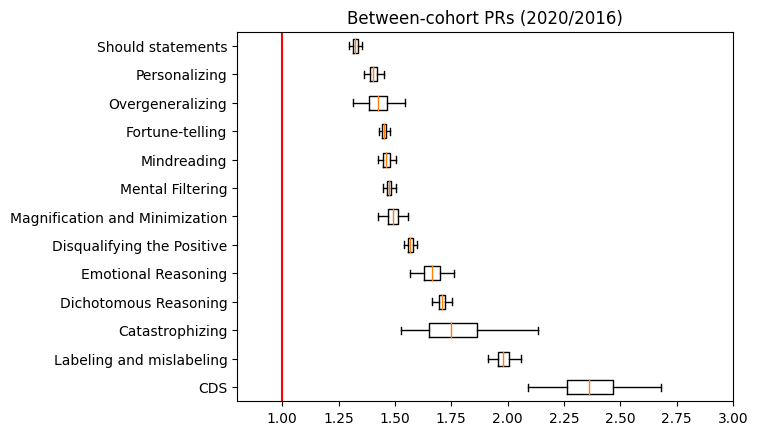

In [110]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()

ax1.boxplot(prs, vert=False, showfliers=False, whis=(2.5,97.5))

ax1.set_yticklabels(pr_cols)
ax1.set_xlim([0.8,3])

plt.axvline(1, color='r')
plt.title("Between-cohort PRs (2020/2016)")

# Between-individual

In [ ]:
pr_cols = ['CDS', 'Labeling and mislabeling', 'Catastrophizing', 'Dichotomous Reasoning', 'Emotional Reasoning',
       'Disqualifying the Positive', 'Magnification and Minimization',
       'Mental Filtering', 'Mindreading', 'Fortune-telling',
       'Overgeneralizing', 'Personalizing', 'Should statements']

user_ct_2020[pr_cols] = (user_ct_2020[pr_cols].div(user_ct_2020["total_tweets"], axis="index"))
user_ct_2016[pr_cols] = (user_ct_2016[pr_cols].div(user_ct_2016["total_tweets"], axis="index"))

In [2]:
user_ct_2020

NameError: name 'user_ct_2020' is not defined

In [144]:
num_runs = 10000

bootstrap_w_20 = pd.DataFrame(columns=pr_cols)
bootstrap_w_16 = pd.DataFrame(columns=pr_cols)

for i in range(num_runs):
    
    if(i%100)==0:
        print(i)
    
    bootstrap_w_20.loc[i, :] = user_ct_2020.sample(n=user_ct_2020.index.size, random_state=rs, replace=True)[pr_cols].mean()
    bootstrap_w_16.loc[i, :] = user_ct_2016.sample(n=user_ct_2016.index.size, random_state=rs, replace=True)[pr_cols].mean()


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [213]:
bootstrap_w_20.to_csv(data_fldr + "231110_users_20_bs.csv")
bootstrap_w_16.to_csv(data_fldr + "231110_users_16_bs.csv")

In [170]:
#prevalence ratios
for col in pr_cols:
    prs[col] = (bootstrap_w_20[col]/bootstrap_w_16[col])

meds = prs.median()
meds.sort_values(ascending=True, inplace=True)
prs = prs[meds.index]

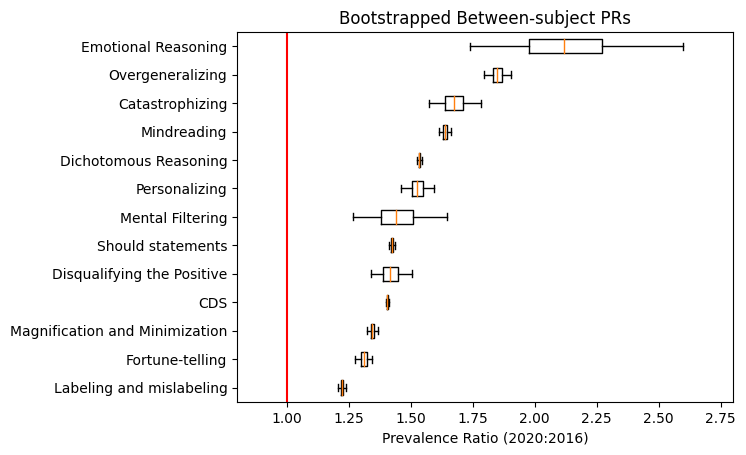

In [171]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()

ax1.boxplot(prs, vert=False, showfliers=False, whis=(2.5,97.5))

ax1.set_yticklabels(prs.columns)
ax1.set_xlim([0.8,2.8])

plt.xlabel("Prevalence Ratio (2020:2016)")
plt.title("Bootstrapped Between-subject PRs")
plt.axvline(1, color='r')